In [1]:
import pandas as pd

## plotting libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches
from matplotlib import font_manager

#Google Trends library
from pytrends.request import TrendReq

In [2]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-UK', tz=360)

# Get data

In [3]:
#get bike searches by country from Google Trends
kw_list = {"AL" : ["biçikletë"], "AD" : ["bicleta"],"AM" : ["հեծանիվ"], "AT": ["Fahrrad"],
           "BY": ["велосипед"], "BE": ["velo"], "BA": ["bicikl"], "BG": ["велосипед"], 
           "CH": ["Velo"], "CY": ["ποδήλατο"],"CZ": ["kolo"],
           "DE": ["Fahrrad"],"DK": ["cykel"],
           "EE": ["jalgratas"], "ES": ["bicicleta"],
           "FO": ["cykel"], "FI": ["Polkupyörä"], "FR": ["vélo"],
           "GB": ["bike"],   "GE": ["ველოსიპედი"], "GR": ["ποδήλατο"],
           "HU": ["kerékpár"], "HR": ["bicikl"],
           "IE": ["bike"], "IS": ["reiðhjól"], "IT": ["bicicletta"],
           "LT": ["dviratis"], "LU": ["vëlo"], "LV": ["velosipēds"],
           "MC": ["velo"], "MK": ["велосипед"], "MT": ["rota"], "ME": ["бицикл"],"MD": ["bicicletă"],
           "NO": ["sykkel"], "NL": ["fiets"], 
           "PL": ["rower"], "PT": ["bicicleta"], 
           "RO": ["bicicletă"],  "RU": ["велосипед"],  "RS":["бицикл"],
           "SE": ["cykel"], "SI": ["kolo"], "SK": ["bicykel"], "SM": ["bicicletta"], 
           "TR": ["bisiklet"], "UA": ["велосипед"], "VA": ["bicicletta"]
           }

data = {}

for country in kw_list.keys():
    pytrends.build_payload(kw_list[country], cat=0, geo=country, timeframe='2019-01-01 2021-12-31') 
    data[country] = pytrends.interest_over_time() 

#convert to dataframe that contains only one column per country
df = []
for k, v in data.items():
    
    #if data is available
    if len(v) !=0:
        v = v.drop(columns="isPartial")
        
        #add country code to column name
        for column in v.columns:
            v = v.rename(columns={column: k + "_" + column})
        df.append(v)
    
df = pd.concat(df, axis=1)

df

,AM_հեծանիվ,AT_Fahrrad,BY_велосипед,BE_velo,BA_bicikl,BG_велосипед,CH_Velo,CY_ποδήλατο,CZ_kolo,DE_Fahrrad,...,PT_bicicleta,RO_bicicletă,RU_велосипед,RS_бицикл,SE_cykel,SI_kolo,SK_bicykel,SM_bicicletta,TR_bisiklet,UA_велосипед
date,,,,,,,,,,,,,,,,,,,,,
2019-01-06,9,14,15,23,11,21,18,0,15,18,...,24,23,15,0,27,19,10,0,12,18
2019-01-13,0,13,14,22,10,22,18,0,19,18,...,27,19,15,0,22,22,14,0,13,19
2019-01-20,0,15,18,21,6,20,17,29,18,18,...,21,10,14,0,23,17,14,0,15,19
2019-01-27,0,16,18,20,8,26,20,0,21,18,...,24,17,16,0,22,18,14,0,16,20
2019-02-03,0,20,25,23,17,23,18,0,19,20,...,27,19,18,0,20,25,17,30,20,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,0,16,12,20,15,18,18,22,24,18,...,37,44,14,0,23,17,18,0,14,17
2021-12-05,8,14,12,21,16,10,17,0,24,19,...,32,42,15,45,19,15,16,0,15,15
2021-12-12,8,13,10,22,6,11,16,24,22,19,...,34,29,15,0,19,17,20,0,13,15


# Explore

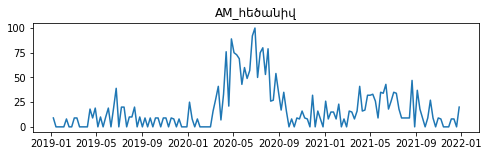

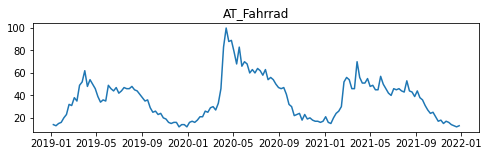

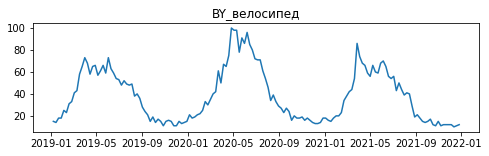

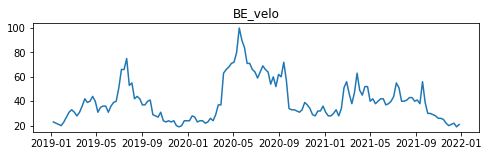

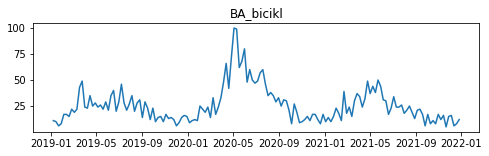

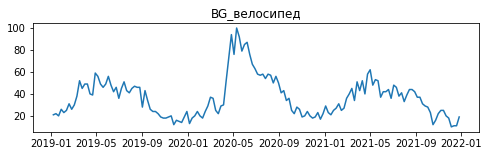

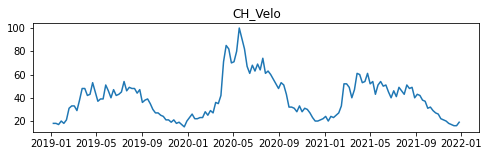

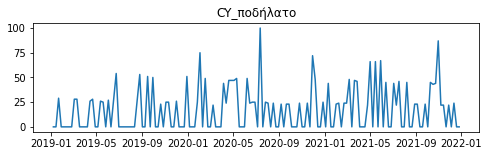

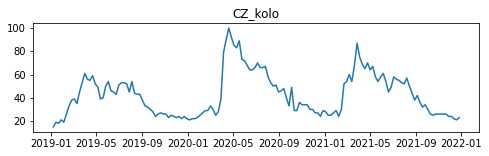

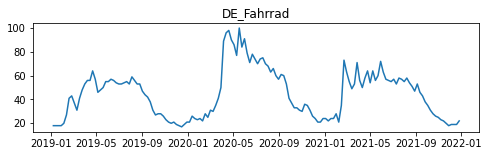

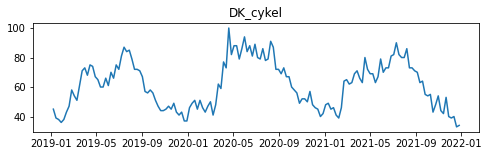

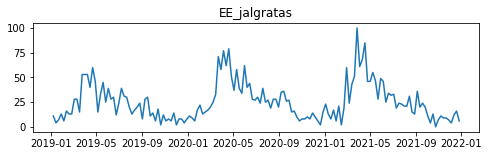

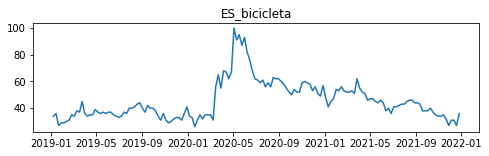

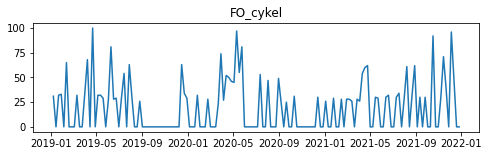

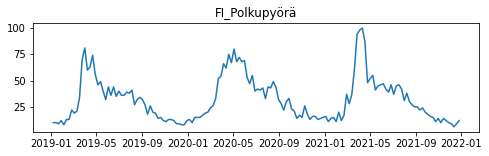

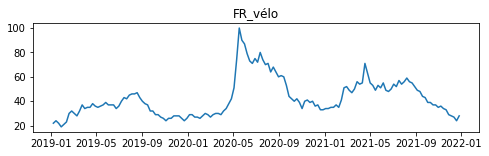

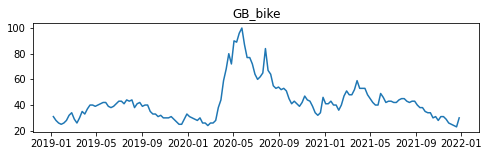

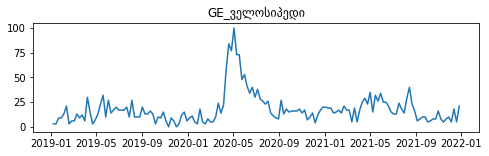

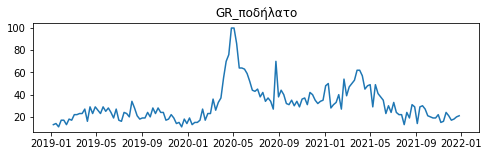

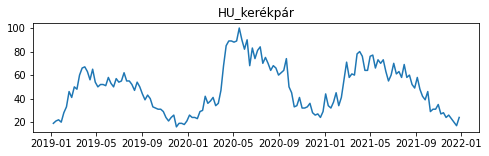

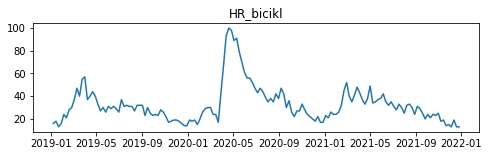

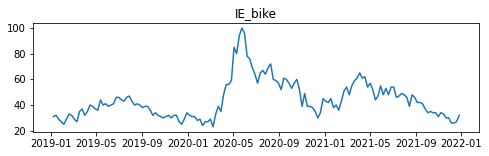

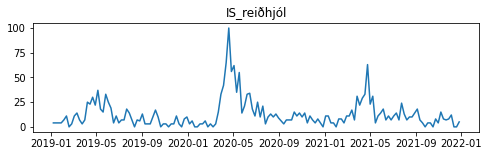

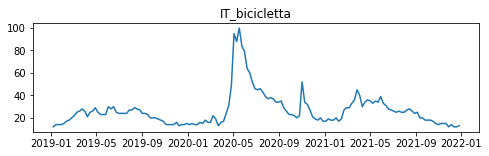

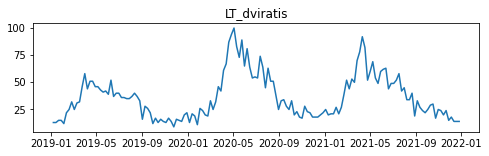

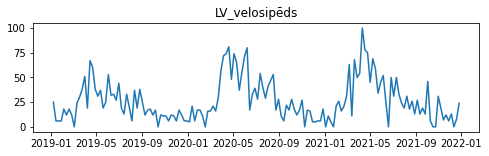

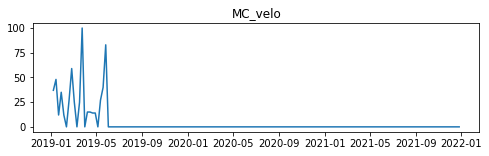

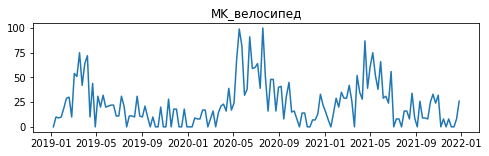

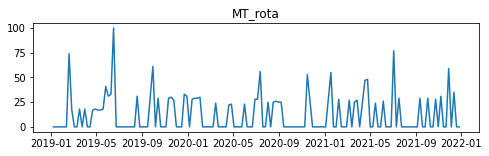

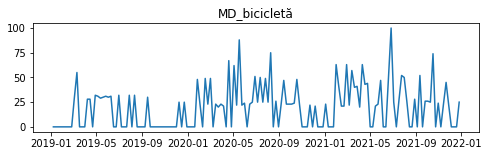

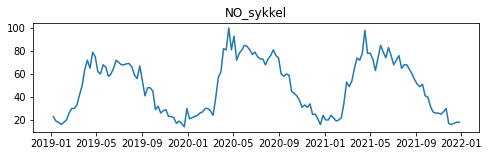

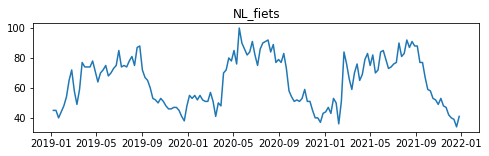

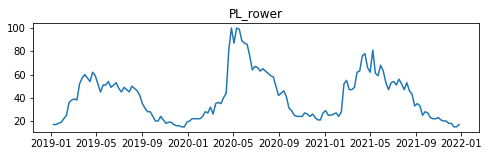

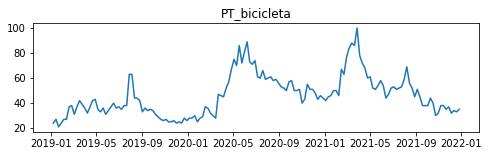

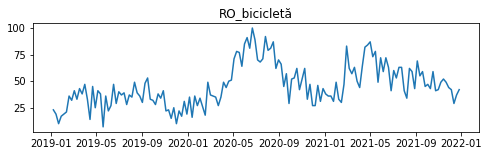

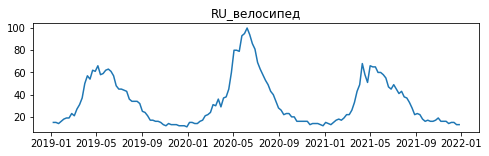

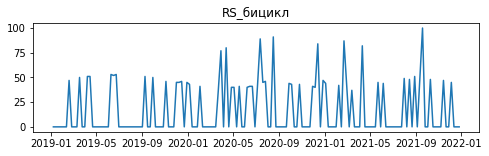

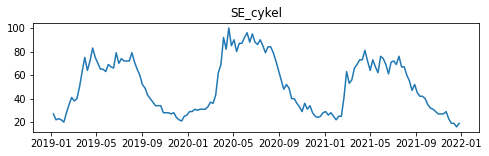

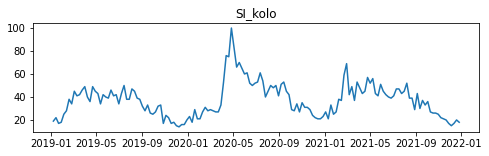

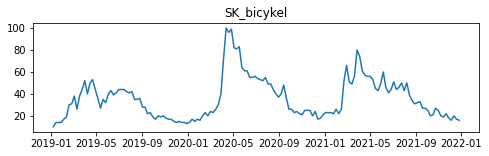

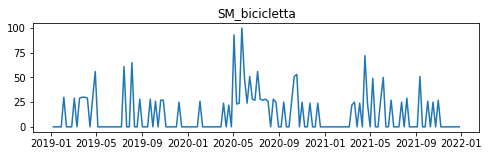

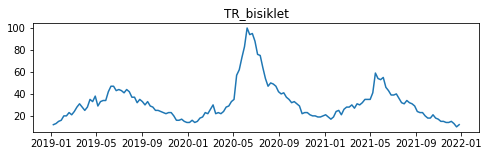

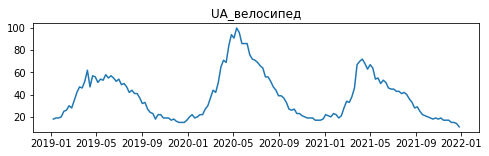

In [4]:
#plot
for i in df.columns:  
    fig = plt.subplots(figsize=(8,2))
    plt.plot(df.index, df[i])
    plt.title(i)
    plt.show()

# Visualise on map

In [24]:
## filter and prepare data
data = df
data.columns = data.columns.str[0:2]

#drop a few countries
data = data.drop(columns=["SM", "RS", "MD", "MT", "MK", "MC", "LV", "FO", "CY", "AM", "TR", "GE", "IS"])

data = data.rolling(4).mean().shift(0)

data.columns

Index(['AT', 'BY', 'BE', 'BA', 'BG', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI',
       'FR', 'GB', 'GR', 'HU', 'HR', 'IE', 'IT', 'LT', 'NO', 'NL', 'PL', 'PT',
       'RO', 'RU', 'SE', 'SI', 'SK', 'UA'],
      dtype='object')

In [11]:
#amended lookup dictionary for country code: grid position, long name, 3 letter name, colour
ctr_dict = {'IS' : [1, "Iceland", "ISL", "Quite unusual"], 'NO' : [5, "Norway", "NOR", "Normal"], 
            "SE" : [6, "Sweden", "SWE", "Normal"], "FI" : [7, "Finland", "FIN", "Normal"], 
            "EE" : [15, "Estonia", "EST", "New normal?"], "IE" : [17, "Ireland", "IRL", "New normal?"],
            "GB" : [18, "Great Britain", "GBR", "New normal?"], "DK": [21, "Denmark", "DNK", "Normal"], 
            "LT": [23, "Lithuania", "LTU", "New normal?"],
             "BE": [27, "Belgium", "BEL", "A bit unusual"], "NL": [28, "Netherlands", "NLD", "Normal"],
            "DE": [29, "Germany", "DEU", "A bit unusual"], "PL":[30, "Poland", "POL", "A bit unusual"], 
            "BY": [31, "Belarus", "BLR", "A bit unusual"],
            "RU" : [32, "Russia", "RUS", "A bit unusual"], "FR": [34, "France", "FRA", "New normal?"], 
            "CH" : [36, "Switzerland", "CHE", "A bit unusual"], "CZ": [38, "Czechia", "CZE", "New normal?"], 
            "SK": [39, "Slovakia", "SVK", "New normal?"],
            "UA" : [40, "Ukraine", "UKR", "A bit unusual"], "PT":[41, "Portugal", "PRT", "New normal?"], 
            "ES": [42, "Spain", "ESP", "New normal?"],
            "IT":[44, "Italy", "ITA", "Quite unusual"], "AT" : [37, "Austria", "AUT", "A bit unusual"], 
            "HU": [46, "Hungary", "HUN", "A bit unusual"],
            "RO": [47, "Romania", "ROU", "New normal?"],
            "SI":[45, "Slovenia", "SVN", "A bit unusual"], "HR": [53, "Croatia", "HRV", "Quite unusual"],
            "BA": [54, "Bosnia", "BIH", "Quite unusual"],  "BG":[55, "Bulgaria", "BGR", "A bit unusual"],
            "GR": [63, "Greece", "GRC", "New normal?"]            
           }

In [84]:
# =======
# set colors and fonts
colours = {"Normal": "#FC7464", "A bit unusual": "#F4CA2E", "Quite unusual": "#EDA806", "New normal?":  "#64BCDC",
          "title": "#111111"}
text_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\OpenSans-Regular.ttf')
title_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\OpenSans-Bold.ttf')
label_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\OpenSans-SemiBold.ttf')
annot_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Raleway-SemiBold.ttf')

main_title="Search interest in bikes across Europe before and during the pandemic"
subtitle = "Exploring changing travel patterns using Google Trends"
legend = "Proportion of people cycling\nat least once a month"
source="Data: Google Trends  |  Design: Lisa Hornung, inspired by Google News Initiative New Normal"  

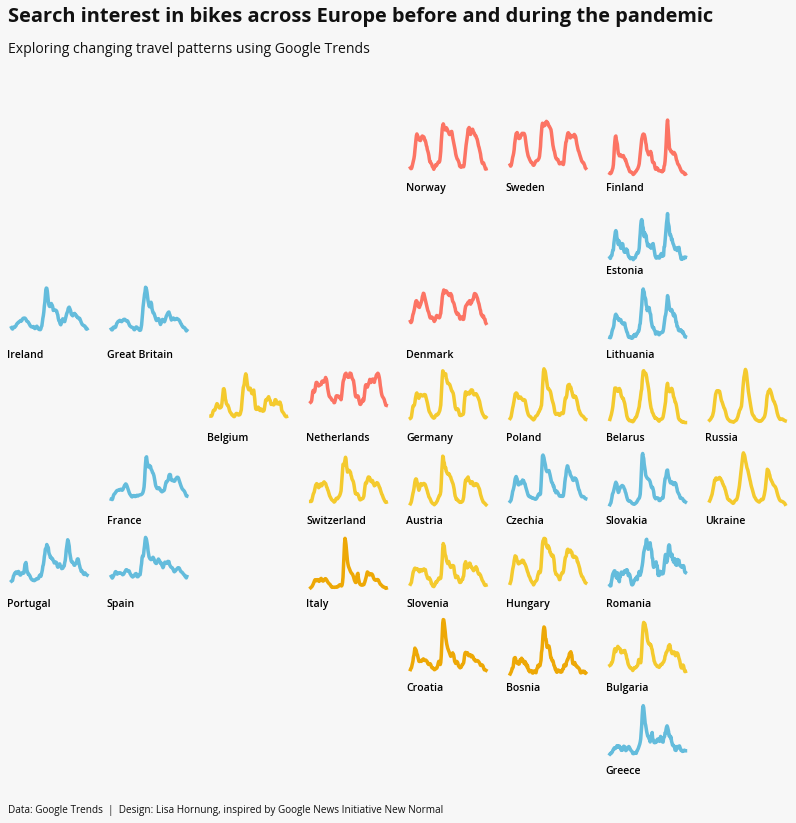

In [88]:
#===== Plotting
#initialise figure and define grid (7 rows, 8 columns)
fig,ax = plt.subplots(8,8, figsize=(14,12), sharey=True) 
#fig.set_facecolor("#F5F5F5")
fig.set_facecolor("#F7F7F7")

#set padding around subplots
plt.subplots_adjust(wspace=0.2, hspace=0.2) 

##Format grid layout - remove frame + axis labels
for a in ax:
    for i in a:
        #i.get_xaxis().set_visible(False)
        #i.get_yaxis().set_visible(False)
        i.set_ylim(ymax=110, ymin=0)   
        i.axis('off')
        for pos in ["top", "bottom", "right", "left"]:
            i.spines[pos].set_visible(False)   

#loop through dataframe
for column in data.columns:   
    
    #find correct subplot position
    plt.subplot(8,8, ctr_dict[column][0])       
    
    #code for plotting data in each tile below 
    plt.plot(data.index, data[column], linewidth=3.5, color=colours[ctr_dict[column][3]])
    #plt.fill_between(data.index, y1=data[column], y2=0, alpha=0.3, color=colours[ctr_dict[column][3]])       
    
    #display name of country (set x + y pos to move around)
    xmin, xmax = plt.gca().get_xlim()
    plt.text(17862,-13, ctr_dict[column][1], fontsize=10.5, ha='left', va='center', fontproperties=label_font)
    
#general title + footer  
y_pos = 1
x_pos = ax[0][0].get_position().corners()[0][0]
fig.text(x_pos, y_pos, main_title, fontsize=20, ha='left',va="top",
             fontweight="bold",  fontproperties=title_font, color=colours["title"])
fig.text(x_pos, y_pos-0.04, subtitle, fontsize=14, ha='left',va="top",
             fontweight="normal",  fontproperties=text_font, color="#111111")
fig.text(x_pos, 0.07, source, fontsize=10, ha='left',va="center",
             fontweight="normal",  fontproperties=text_font, linespacing=1.5, color="#111111")

#save
plt.savefig("bike-searches-pandemic-europe.svg", bbox_inches="tight",pad_inches=0.2)

plt.show()

In [37]:
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

['C:\\Windows\\Fonts\\consola.ttf',
 'C:\\Windows\\Fonts\\Ubuntu-L.ttf',
 'C:\\Windows\\Fonts\\Semplicita Light.otf',
 'C:\\Windows\\Fonts\\MandaloreCondensedItalic-MVV1x.otf',
 'C:\\Windows\\Fonts\\OpenSans-Regular.ttf',
 'C:\\Windows\\Fonts\\BOOKOSI.TTF',
 'C:\\Windows\\Fonts\\Raleway-Medium.ttf',
 'C:\\WINDOWS\\Fonts\\OpenSans-ExtraBoldItalic.ttf',
 'C:\\WINDOWS\\Fonts\\SitkaI.ttc',
 'C:\\WINDOWS\\Fonts\\ANTQUAB.TTF',
 'C:\\Windows\\Fonts\\taileb.ttf',
 'C:\\Windows\\Fonts\\Ubuntu-C.ttf',
 'C:\\WINDOWS\\Fonts\\georgia.ttf',
 'C:\\WINDOWS\\Fonts\\Semplicita Ombra.otf',
 'C:\\Users\\lisa.hornung\\AppData\\Local\\Microsoft\\Windows\\Fonts\\fa-v4compatibility.ttf',
 'C:\\Windows\\Fonts\\Inkfree.ttf',
 'C:\\Windows\\Fonts\\segoesc.ttf',
 'C:\\WINDOWS\\Fonts\\NirmalaB.ttf',
 'C:\\WINDOWS\\Fonts\\REFSAN.TTF',
 'C:\\WINDOWS\\Fonts\\MandaloreLaserTitleItalic-jEEpj.otf',
 'C:\\Windows\\Fonts\\MandaloreLaserLeftalic-DOOqd.otf',
 'C:\\Windows\\Fonts\\GOTHIC.TTF',
 'C:\\Windows\\Fonts\\consolab.

## Original map layout

In [ ]:
#lookup dictionary for country code: grid position, long name, 3 letter name
orig_ctr_dict = {'IS' : [1, "Iceland", "ISL"], 'NO' : [5, "Norway", "NOR"], "SE" : [6, "Sweden", "SWE"],
            "FI" : [7, "Finland", "FIN"], "EE" : [17, "Estonia", "EST"], "IE" : [21, "Ireland", "IRL"],
            "GB" : [22, "Great Britain", "GBR"], "DK": [25, "Denmark", "DNK"], "LT": [27, "Lithuania", "LTU"],
            "LV": [28, "Latvia", "LVA"], "BE": [33, "Belgium", "BEL"], "NL": [34, "Netherlands", "NLD"],
            "DE": [35, "Germany", "DEU"], "PL":[36, "Poland", "POL"], "BY": [37, "Belarus", "BLR"],
            "RU" : [38, "Russia", "RUS"], "FR": [42, "France", "FRA"], "LU":[43, "Luxembourg", "LUX"],
            "CH" : [44, "Switzerland", "CHE"], "CZ": [45, "Czechia", "CZE"], "SK": [46, "Slovakia", "SVK"],
            "UA" : [47, "Ukraine", "UKR"], "PT":[51, "Portugal", "PRT"], "ES": [52, "Spain", "ESP"],
            "IT":[54, "Italy", "ITA"], "AT" : [55, "Austria", "AUT"], "HU": [56, "Hungary", "HUN"],
            "RO": [57, "Romania", "ROU"], "MD":[58, "Moldova", "MDA"], "GE": [59, "Georgia", "GEO"],
            "SM": [63, "San Marino", "SMR"], "SI":[64, "Slovenia", "SVN"], "HR": [65, "Croatia", "HRV"],
            "BA": [66, "Bosnia", "BIH"], "RS": [67, "Serbia", "SRB"], "BG":[68, "Bulgaria", "BGR"],
            "TR" : [69, "Turkey", "TUR"], "MT":[72, "Malta", "MLT"], "ME":[76, "Montenegro", "MNE"],
            "XK": [77, "Kosovo", "KOS"], "MD" : [58, "N. Macedonia", "MKD"], "CY":[79, "Cyprus", "CYP"],
            "AM":[80, "Armenia", "ARM"], "AL":[87, "Albania", "ALB"], "GR": [87, "Greece", "GRC"]            
           }